In [1]:
# apply decision tree model on iris dataset
#load the dataset
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
import pandas as pd
df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [12]:
## splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X = df
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [13]:
# fitting the model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
## accuracy score on the training dataset
clf.score(X_train, Y_train)

1.0

In [16]:
## accuracy score on the testing dataset
clf.score(X_test, Y_test)

0.97368421052631582

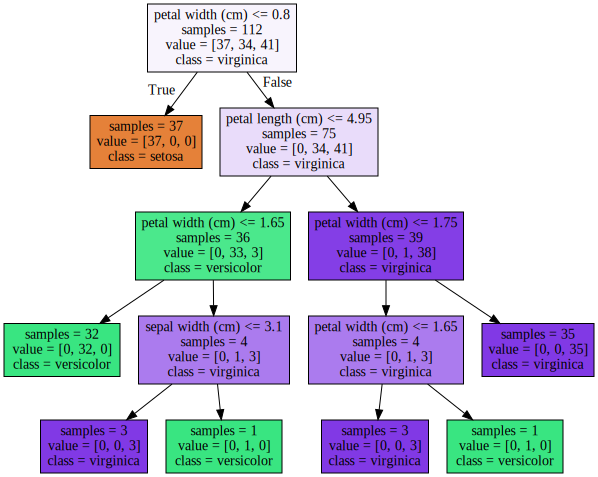

In [23]:
## plotting the decision tree
from adspy_shared_utilities import plot_decision_tree
plot_decision_tree(clf, iris.feature_names, iris.target_names)

In [17]:
# Setting max decision tree depth to three to help avoid overfitting
clf1 = DecisionTreeClassifier(max_depth =3)

In [18]:
## fitting the dataset
clf1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
## accuracy score on the training dataset after max_depth set to 3
clf1.score(X_train, Y_train)

0.9821428571428571

In [21]:
## accuracy score on the testing dataset after max_depth set to 3
clf1.score(X_test, Y_test)

0.97368421052631582

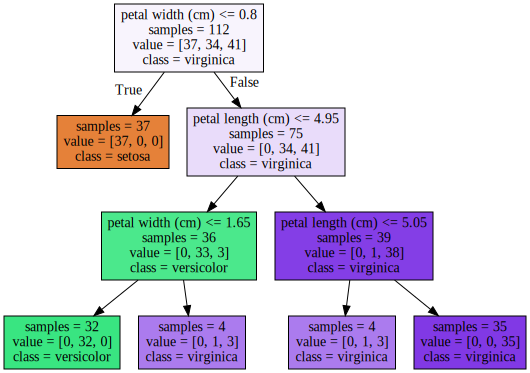

In [24]:
## plotting the decision tree with max_depth = 3
from adspy_shared_utilities import plot_decision_tree
plot_decision_tree(clf1, iris.feature_names, iris.target_names)

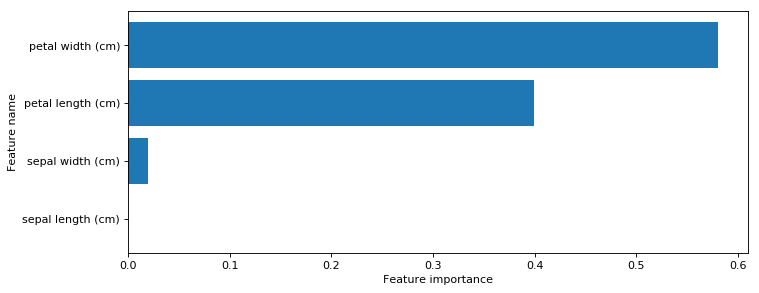

Feature importances: [ 0.          0.02014872  0.39927524  0.58057605]


In [28]:
## Feature importance
from adspy_shared_utilities import plot_feature_importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

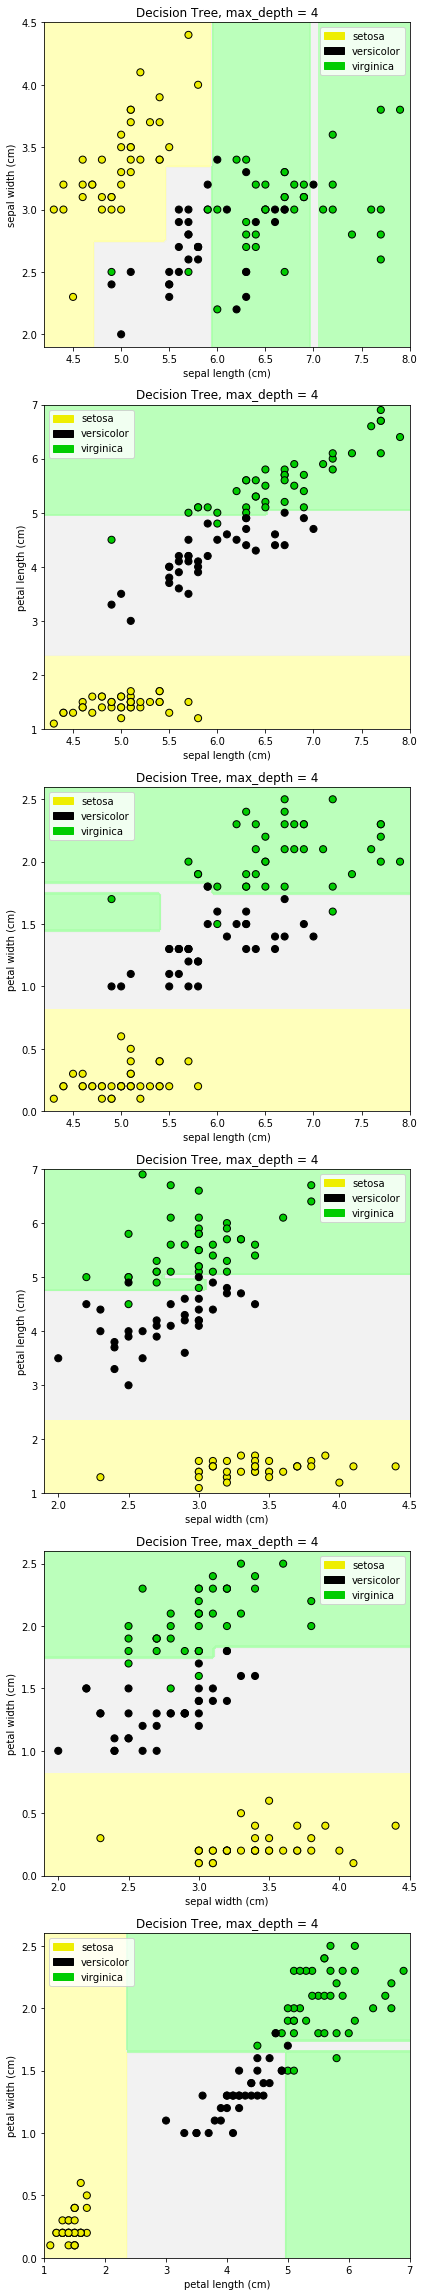

In [29]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()